# K-MEANS

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 라이브러리 호출
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import cv2
import os,glob,shutil

In [3]:
# GPU 설정 (CPU일경우 실행 X)
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     for gpu in gpus:
#       tf.config.experimental.set_memory_growth(gpu, True)
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     print(e)

In [112]:
# 데이터셋 준비
input_dir='C:/pets' # 경로에 한글이 설정되면 오류가 나서 되지 않기 때문에, c드라이브에 바로 pets폴더를 옮겨놓았음
glob_dir = input_dir + '/*.jpg'

images = [cv2.resize(cv2.imread(file),(224,224)) for file in glob.glob(glob_dir)]
paths = [file for file in glob.glob(glob_dir)]
images = np.array(np.float32(images).reshape(len(images), -1)/255)

In [106]:
# 오류가 났을때 대처하기 위해 사용했던 코드
glob_dir = input_dir + '/*.jpg'
for file in glob.glob(glob_dir):
    path = os.path.join(input_dir,glob_dir,file)
    path = path.replace('\\','/')
    print('[DEBUG] path:', path)
#     path = path.replace('\\','/')

    img = cv2.imread(path)

    if img is None:
        print('Wrong path:', path)
    else:
        img = cv2.resize(img, dsize=(128,128))
        images.append(img)

[DEBUG] path: C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap11/data/pets/11175.jpg
Wrong path: C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap11/data/pets/11175.jpg
[DEBUG] path: C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap11/data/pets/11247.jpg
Wrong path: C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap11/data/pets/11247.jpg
[DEBUG] path: C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap11/data/pets/11248.jpg
Wrong path: C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap11/data/pets/11248.jpg
[DEBUG] path: C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap11/data/pets/119.jpg
Wrong path: C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap11/data/pets/119.jpg
[DEBUG] path: C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap11/data/pets/125.jpg
Wrong path: C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap11/data/pets/125.jpg
[DEBUG] path: C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap11/data/pets/128.jpg
Wrong path: C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap11/data/pets/128.jpg
[DEB

In [113]:
# 특성추출
model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
predictions = model.predict(images.reshape(-1, 224, 224, 3)) # 1
pred_images = predictions.reshape(images.shape[0], -1) # 2

- 1 : 특성 추출을 위해 mobilenetv2사용
    - include_top : 네트워크 최상단에 완전연결층을 넣을지 여부를 선택하는 것,  False로 설정했기 때문에, 완전연결층을 추가하지 않음
    - weights : None,imagenet 선택할 수 있음. None는 임의의 초기값을 설정하는 것, imagenent는 ImageNet에 대한 선행학습의 가중치를 사용했다는 것
    - input_shape : 입력에 대한 크기 의미 224x224 크기, 3은 RGB 의미
- 2 : reshape의 인자 -1은 해당 자리 부분의 형태는 비워두고, 다른 차원의 형태가 모두 결정된 후 남은 부분의 형태로서 수정하겠다는 것

In [114]:
# 클러스터링 구성
k = 2 # 클래스는 개와 고양이 2개
kmodel = KMeans(n_clusters=k, n_jobs=-1, random_state=728)
kmodel.fit(pred_images) # 모델 훈련
kpredictions = kmodel.predict(pred_images) # 모델 예측
shutil.rmtree('C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap11/data/output') # 모델이 분류될 폴더의 위치 지정
for i in range(k):
    os.makedirs("../chap11/data/output" + str(i)) # 모델이 분류될 폴더 생성(output0,outpu1 생성)
for i in range(len(paths)):
    shutil.copy2(paths[i], "C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap11/data/output"+str(kpredictions[i])) # pets 폴더의 이미지들이 output0과 output1로 복사되면서 클래스에 적합하게 분류

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [115]:
# K-MEANS에서 클래스 개수 알아보기
sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters = k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric = 'euclidean')) # 실루엣 방법을 이용한 클래스 개수 확인
    kl.append(k)

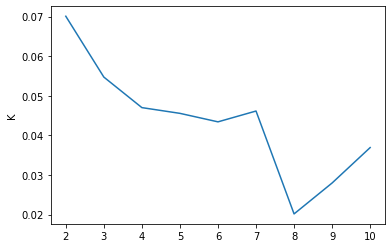

In [116]:
# 실루엣의 시각화
plt.plot(kl, sil)
plt.ylabel('Silhoutte Score')
plt.ylabel('K')
plt.show()


# 가우시안 혼합 모델

In [12]:
# 라이브러러 불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
X_train=np.load('C:/Users/이신행/OneDrive/바탕 화면/딥러닝텐서플로교과서_예제파일/chap11/data/data.npy') # 1

- 1 : 파일을 배열로 불러오는 방법
    - np.load : np.save로 저장된 data.npy파일을 불러옴
    - np.save : 배열 한개를 넘파이 형식의 바이너리 파일로 저장

[[3.0363831  3.09828041]
 [1.60629419 1.3470999 ]]


[[[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]

 [[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]]


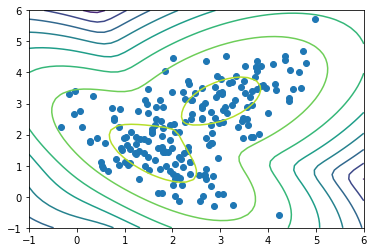

In [13]:
# GMM생성
gmm=GaussianMixture(n_components=2) # n_components는 가우시안 개수를 의미하므로 가우시안 2개가 겹쳐보이게 구성
gmm.fit(X_train)

print(gmm.means_)
print('\n')
print(gmm.covariances_)

X,Y=np.meshgrid(np.linspace(-1,6),np.linspace(-1,6)) # 행단위와 열단위로 각각 해당배열을 정방행렬로 선언
XX=np.array([X.ravel(),Y.ravel()]).T # 다차원 배열을 1차원으로
Z=gmm.score_samples(XX)
Z=Z.reshape((50,50))

plt.contour(X,Y,Z)
plt.scatter(X_train[:,0],X_train[:,1])
plt.show()

# 자기조직화 지도

In [14]:
pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8608 sha256=dc53324446ec1d1df378a5c8458b03b584789707b7a9bfd3d2ac85eeaa5d0fc5
  Stored in directory: c:\users\이신행\appdata\local\pip\cache\wheels\b2\b8\f9\08876fa31be00070d6a60686b9842e044d1a9b471e8d6772d4
Successfully built MiniSom
Note: you may need to restart the kernel to use updated packages.


In [15]:
# 라이브러리 호출 및 데이터셋 내려받기
import numpy as np
from sklearn.datasets import load_digits
from minisom import MiniSom
from pylab import plot,axis,show,pcolor,colorbar,bone

digits=load_digits() # 숫자 필기 이미지 데이터셋 내려받기
data=digits.data # 훈련 데이터셋
labels=digits.target #  정답(레이블)

SOM 초기화

. SOM 진행 종료


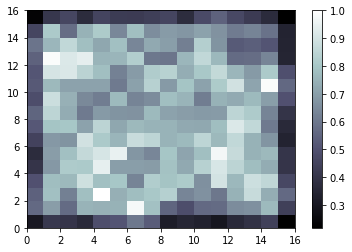

In [18]:
# 훈련 데이터셋을 MiniSom 알고리즘에 적용
som=MiniSom(16,16,64,sigma=1.0,learning_rate=0.5) # 1
som.random_weights_init(data)
print('SOM 초기화')
som.train_random(data,10000)
print("\n. SOM 진행 종료")

bone()
pcolor(som.distance_map().T)
colorbar()

- 1 : MiniSom은 시각화 기능이 거의 없는 som을 구현할 수 있는 라이브러리
    - 16 : x축에 대한 차원
    - 16 : y축에 대한 차원
    - 64 : 입력 벡터에 대한 개수
    - sigma=1.0 : 이웃노드와의 인접 반경
    - learning_rate=0.5 : 한번 학습할 때 얼마큼 변화를 주는지에 대한 상수

<ipython-input-24-d3a3044b280c>:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels == '0'] = 0 # 레이블 설정
<ipython-input-24-d3a3044b280c>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels == '1'] = 1
<ipython-input-24-d3a3044b280c>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels == '2'] = 2
<ipython-input-24-d3a3044b280c>:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels == '3'] = 3
<ipython-input-24-d3a3044b280c>:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels == '4'] = 4
<ipython-input-24-d3a3044b280c>:7: FutureWarni

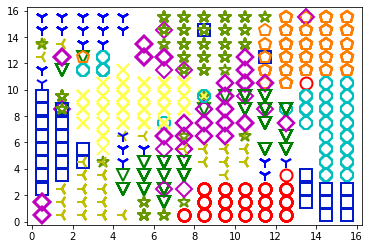

In [24]:
# 클래스에 대해 레이블 설정 및 색상 할당
labels[labels == '0'] = 0 # 레이블 설정
labels[labels == '1'] = 1
labels[labels == '2'] = 2
labels[labels == '3'] = 3
labels[labels == '4'] = 4
labels[labels == '5'] = 5
labels[labels == '6'] = 6
labels[labels == '7'] = 7
labels[labels == '8'] = 8
labels[labels == '9'] = 9

markers = ['o', 'v', '1', '3', '8', 's', 'p', 'x', 'D', '*']
colors = ["r", "g", "b", "y", "c", (0,0.1,0.8), (1,0.5,0), (1,1,0.3), "m", (0.4,0.6,0)]

for cnt,xx in enumerate(data): # 시각화 처리
    w = som.winner(xx)  # 승자(우승 노드) 식별
    plot(w[0]+.5,w[1]+.5,markers[labels[cnt]], # 1   
    markerfacecolor='None', markeredgecolor=colors[labels[cnt]], 
    markersize=12, markeredgewidth=2)

show()

- 1 : BMU를 이용하여 승자를 식별하고 클래스별로 마커를 플로팅, 여기에서 BMU는 MiniSom알고리즘을 이용해 모든 가중치 벡터의 데이터 공간에서 유클리드 거리를 측정하여 승자 식별